In [4]:
import torch
from datasets import IndexedDataset, WeightedDataset, load_data
from torch.utils.data import DataLoader, DistributedSampler

from utils import get_args
from architectures import load_architecture

from samplers import DistributedCustomSampler
from losses import trades_loss, apgd_loss
from tqdm.notebook import tqdm
from architectures import load_architecture, add_lora, set_lora_gradients #load_statedict

import torch.nn as nn

args = get_args()
args.arch = 'convnext'
args.dataset = 'Aircraft'
args.selection_method = 'random'
args.aug = 'aug'
args.pre_trained = 'imagenet1k_non_robust'
args.loss_function = 'APGD'

args.iterations = 20
args.pruning_ratio = 0.99
args.delta = 1
args.batch_size = 24
args.pruning_strategy = 'fixed_stratified'
args.batch_strategy = 'random'
args.sample_size= 128
args.init_lr = 0.001

# Example Usage

# model = load_architecture(args)

# state_dict = torch.load('./state_dicts/convnext_tiny_22k_224.pth')
# model.load_state_dict(state_dict)
# model, target_layers = load_architecture(args)
# add_lora(args, model, target_layers)
# set_lora_gradients(args, model, target_layers)

# model.to('cuda')

# train_dataset, val_dataset, test_dataset, N, transform = load_data(args) 

# train_dataset = WeightedDataset(args, train_dataset, transform, N, prune_ratio = args.pruning_ratio,  )

# train_sampler = DistributedCustomSampler(args, train_dataset, num_replicas=2, rank=0, drop_last=True)

# trainloader = DataLoader(train_dataset, batch_size=None, sampler = train_sampler, ) #

./data


In [15]:
import torch


ckpt

{'0.init_conv.weight': tensor([[[[ 5.7243e-03,  1.3248e-03,  7.9090e-03],
           [ 1.8391e-03, -2.0633e-02,  5.2600e-03],
           [ 4.4807e-03,  3.1841e-04,  6.8445e-03]],
 
          [[-1.9339e-03, -4.5309e-03, -1.7386e-03],
           [-3.1358e-03, -1.7292e-01, -4.0183e-03],
           [-2.1173e-03, -4.0450e-03, -1.7083e-03]],
 
          [[ 1.7171e-03, -8.8894e-04,  2.0820e-03],
           [-8.4910e-04,  4.4165e-03,  6.5972e-04],
           [ 2.3274e-03, -2.5027e-04,  2.1487e-03]]],
 
 
         [[[ 3.9495e-03, -6.9210e-04,  4.3983e-03],
           [-2.2492e-03,  1.2449e-02,  2.6082e-03],
           [ 3.3389e-03,  2.6070e-03,  4.3821e-03]],
 
          [[-6.1632e-03, -3.1835e-03, -7.1310e-03],
           [-5.0936e-03, -3.5948e-01, -3.9593e-03],
           [-7.3240e-03, -1.5266e-03, -7.3119e-03]],
 
          [[-2.8426e-04, -1.9754e-03,  3.2108e-03],
           [ 1.2684e-05, -3.3029e-02, -2.1379e-03],
           [ 8.1509e-04, -2.6293e-05,  2.5888e-03]]],
 
 
         [[[-6.115

In [7]:
from architectures import wideresnetwithswish

# Set parameters for WideResNet-28-10
depth = 28
widen = 10
act_fn = 'swish'  # Assuming 'swish' is the desired activation function
num_classes = 200

# Instantiate the model
model = wideresnetwithswish(depth, widen, act_fn, num_classes)



In [8]:
import torch

ckpt = torch.load('./state_dicts/tiny_linf_wrn28-10.pt')
ckpt = {k.replace('module.0.', ''): v for k, v in ckpt['model_state_dict'].items()}

model.load_state_dict(ckpt)

model

WideResNet(
  (init_conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (layer): Sequential(
    (0): _BlockGroup(
      (block): Sequential(
        (0): _Block(
          (batchnorm_0): BatchNorm2d(16, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
          (relu_0): SiLU(inplace=True)
          (conv_0): Conv2d(16, 160, kernel_size=(3, 3), stride=(1, 1), bias=False)
          (batchnorm_1): BatchNorm2d(160, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
          (relu_1): SiLU(inplace=True)
          (conv_1): Conv2d(160, 160, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (shortcut): Conv2d(16, 160, kernel_size=(1, 1), stride=(1, 1), bias=False)
        )
        (1): _Block(
          (batchnorm_0): BatchNorm2d(160, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
          (relu_0): SiLU(inplace=True)
          (conv_0): Conv2d(160, 160, kernel_size=(3, 3), stride=(1,

In [14]:
from avalanche.benchmarks.classic import SplitCIFAR10

split_cifar10 =  SplitCIFAR10(n_experiences = 10, return_task_id = True, seed = 0)

train_stream = split_cifar10.train_stream
test_stream = split_cifar10.test_stream

print()
# train and test loop
results = []
for train_task in train_stream:
    print('train')
    print('append results')
    print()

Files already downloaded and verified
Files already downloaded and verified

train
append results

train
append results

train
append results

train
append results

train
append results

train
append results

train
append results

train
append results

train
append results

train
append results



In [1]:
import torchvision
from torchvision.datasets import EuroSAT
from torchvision import datasets, transforms
from datasets import EuroSATDataset
from torch.utils.data import DataLoader



# # Define transformations (e.g., resize, normalization)
# transform = transforms.Compose([
#     transforms.Resize((64, 64)),  # Resize to 64x64, adjust as needed
#     transforms.ToTensor(),       # Convert to PyTorch Tensor
# ])

# Set the root directory to the extracted folder
dataset = EuroSATDataset(root_dir='./data/EuroSAT/2750')#, transform=transform)

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# Create a DataLoader to iterate through the dataset
# dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Example: Iterate through the DataLoader
# for images in dataloader:
#     print(images.shape)  # e.g., torch.Size([32, 3, 64, 64])
#     break


# Download the dataset
# dataset = EuroSAT(root='./data', download=True, transform=None)

In [9]:
from sklearn.model_selection import train_test_split
from datasets import EuroSATDataset
import torch



# Now you can use DataLoader to load these subsets


In [11]:
len(val_dataset)


3240

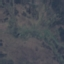

In [9]:
dataset[10]

In [120]:


# Example usage
import pandas as pd

# Example DataFrames
df1 = pd.DataFrame({'unique_id': [1, 2, 3, 4, 5]})
df2 = pd.DataFrame({'unique_id': [10]})

exists, iloc_index = check_unique_id(df1, df2)
print(f"Exists: {exists}, iloc index: {iloc_index}")


Exists: False, iloc index: None


In [122]:
import pandas as pd
import numpy as np
from filelock import FileLock
import hashlib
import json
from datetime import datetime
import os

import pandas as pd
import numpy as np


import hashlib
import json











args = get_args()
args.arch = 'convnext2'
syn_results(args, 0.5, 0.7)

./data
exists True [1]
experiment already exists in the database


In [123]:
args

Namespace(arch='convnext2', aug=None, batch_size=64, batch_strategy='random', beta=1.0, data_dir='./data', dataset='CIFAR10', delta=1, device=device(type='cpu'), distance='l_inf', epsilon=0.01568627450980392, exp='', init_lr=None, iterations=10, log_dir='./logs', lora=None, loss_function='TRADES_v2', momentum=0.9, num_workers=1, perturb_steps=10, pre_trained=None, pruning_ratio=0, pruning_strategy='random', sample_size=64, sched='sched', seed=0, statedict_dir='./state_dicts', step_size=0.00784313725490196, task='train', unsup_fraction=0.3, weight_decay=0.0001)

In [4]:
import pandas as pd

# Convert argparse.Namespace to a dictionary
args_dict = vars(args)

# Convert the dictionary to a DataFrame
df = pd.DataFrame([args_dict])

df

,arch,pre_trained,lora,dataset,pruning_strategy,pruning_ratio,batch_strategy,aug,iterations,delta,...,num_workers,epsilon,step_size,perturb_steps,beta,distance,unsup_fraction,exp,device,selection_method
0,convnext,imagenet1k_non_robust,None,Aircraft,fixed_stratified,0.99,random,aug,20,1,...,1,0.015686,0.007843,10,1.0,l_inf,0.3,,cuda,random


In [17]:
list( args_dict.keys() )

['arch',
 'pre_trained',
 'lora',
 'dataset',
 'pruning_strategy',
 'pruning_ratio',
 'batch_strategy',
 'aug',
 'iterations',
 'delta',
 'batch_size',
 'sample_size',
 'loss_function',
 'init_lr',
 'sched',
 'momentum',
 'weight_decay',
 'seed',
 'log_dir',
 'statedict_dir',
 'data_dir',
 'task',
 'num_workers',
 'epsilon',
 'step_size',
 'perturb_steps',
 'beta',
 'distance',
 'unsup_fraction',
 'exp',
 'device',
 'selection_method']

In [11]:
import pandas as pd
import numpy as np

def experiment_exists(df, current_experiment, key_columns, tol=1e-6):
    """
    Check if the current experiment already exists in the DataFrame based on key columns.

    Parameters:
    df (pd.DataFrame): The DataFrame containing previous experiments.
    current_experiment (dict): The arguments of the current experiment as a dictionary.
    key_columns (list): The list of columns to use as the key for comparison.
    tol (float): Tolerance for floating-point comparison.

    Returns:
    bool: True if the experiment exists based on key columns, False otherwise.
    """
    # Filter the DataFrame to only include the key columns
    df_key = df[key_columns]

    # Convert the current experiment to a DataFrame with only the key columns
    current_experiment_key = {k: current_experiment[k] for k in key_columns}
    current_df_key = pd.DataFrame([current_experiment_key])

    # Adjust for floating-point comparisons
    matches = []
    for col in key_columns:
        if df_key[col].dtype.kind in 'fc':  # if column is float or complex
            match_series = pd.Series(np.isclose(df_key[col], current_df_key[col].iloc[0], atol=tol))
        else:
            match_series = df_key[col] == current_df_key[col].iloc[0]
        matches.append(match_series)

    # Combine all conditions and check if any row matches completely
    exists = pd.concat(matches, axis=1).all(axis=1).any()

    return exists

# Example usage
# Assume df is your existing DataFrame with experiment results, including a "final_performance" column
df = pd.DataFrame([
    {'learning_rate': 0.001, 'batch_size': 32, 'epochs': 10, 'final_performance': 0.85},
    {'learning_rate': 0.01, 'batch_size': 64, 'epochs': 15, 'final_performance': 0.9}
])

# Current experiment as a dictionary
current_experiment = {'learning_rate': 0.001, 'batch_size': 32, 'epochs': 10}

# Define the key columns to check for experiment existence
key_columns = ['learning_rate', 'batch_size', 'epochs']

# Check if the experiment exists based on key columns
exists = experiment_exists(df, current_experiment, key_columns)
print(f"Experiment exists based on key columns: {exists}")


KeyError: 'final_performance'

In [8]:
train_dataset

Dataset FGVCAircraft
    Number of datapoints: 3334
    Root location: ./data

In [32]:
import timm

from timm.models import create_model

model = timm.create_model('convnext_tiny.fb_in22k', pretrained=True)
model_save_path = "./state_dicts/test.pth"
torch.save(model.state_dict(), model_save_path)

state_dict = torch.load('./state_dicts/test.pth')
model = timm.models.convnext.convnext_tiny(pretrained=False)
num_features = model.head.fc.in_features
model.head.fc = nn.Linear(num_features, 21841)  
model.load_state_dict(state_dict)

In [1]:
import math

def adjust_epochs(original_data_size, pruned_data_size, batch_size, original_epochs):

    # Calculate the total number of iterations with the original data
    original_iterations_per_epoch = math.ceil(original_data_size / batch_size)
    total_iterations_original = original_iterations_per_epoch * original_epochs

    # Calculate the number of iterations per epoch with the pruned data
    pruned_iterations_per_epoch = math.ceil(pruned_data_size / batch_size)

    # Calculate the number of epochs needed for pruned data to match total iterations
    adjusted_epochs = math.ceil(total_iterations_original / pruned_iterations_per_epoch)
    
    return adjusted_epochs

# Example usage
original_data_size = 47500  # Size of original dataset
batch_size = 1042             # Batch size for training
original_epochs = 50        # Number of epochs for original dataset

# Case 1: Pruning with 30% of data kept (70% pruned)
pruned_data_size_30 = int(0.30 * original_data_size)
adjusted_epochs_30 = adjust_epochs(original_data_size, pruned_data_size_30, batch_size, original_epochs)
print(f'Adjusted epochs for 70% pruned data: {adjusted_epochs_30}')

# Case 2: Pruning with 50% of data kept (50% pruned)
pruned_data_size_50 = int(0.50 * original_data_size)
adjusted_epochs_50 = adjust_epochs(original_data_size, pruned_data_size_50, batch_size, original_epochs)
print(f'Adjusted epochs for 50% pruned data: {adjusted_epochs_50}')

# Case 3: Pruning with 70% of data kept (30% pruned)
pruned_data_size_70 = int(0.70 * original_data_size)
adjusted_epochs_70 = adjust_epochs(original_data_size, pruned_data_size_70, batch_size, original_epochs)
print(f'Adjusted epochs for 30% pruned data: {adjusted_epochs_70}')

# Case 4: No pruning 
adjusted_epochs = adjust_epochs(original_data_size, original_data_size, batch_size, original_epochs)
print(f'Adjusted epochs for no pruning: {adjusted_epochs}')


Adjusted epochs for 70% pruned data: 165
Adjusted epochs for 50% pruned data: 100
Adjusted epochs for 30% pruned data: 72
Adjusted epochs for no pruning: 50


In [1]:
import torch
from torch.utils.data import DataLoader
from torchgeo.datasets import EuroSAT
from torchvision import transforms

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    # You can add normalization or other transformations if needed
])

# Load the RGB version of the EuroSAT dataset
dataset = EuroSAT(
    root='data',
    split='train',
    download=True,
    bands=['R', 'G', 'B'],  # Load only the RGB bands
    transforms=transform
)

# Create DataLoader
dataloader = DataLoader(
    dataset,
    batch_size=32,
    shuffle=True,
    num_workers=4
)

# Iterate over the DataLoader
for batch in dataloader:
    images = batch['image']
    labels = batch['label']

    # Your training code here
    print(f"Batch images shape: {images.shape}")
    print(f"Batch labels: {labels}")
    break  # Remove this break in your actual training loop


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1145)>

In [2]:
from losses import get_loss, get_eval_loss
import numpy as np
from losses import apgd_loss

rank = 'cuda'

optimizer = torch.optim.SGD( model.parameters(),lr=args.init_lr, weight_decay=args.weight_decay, momentum=args.momentum, nesterov=True, )

for iteration in range(args.iterations):

    model.eval()
    train_sampler.set_epoch(iteration)
    
#     for batch_id, batch in tqdm(enumerate( trainloader ) ):
#         # print(batch_id)
#         if batch_id == 0:

#             optimizer.zero_grad()

#             data, target, idxs = batch

#             # print(data,target, idxs)

#             data, target = data.to(rank), target.to(rank) 

#             loss_values, clean_values, robust_values, logits_nat, logits_adv = get_loss(args, model, data, target, optimizer)
# #             # # print(logits_adv.shape)
# #             # # print(logits_nat.shape)
# #             # # assert torch.isfinite(loss_values).all(), "Loss contains NaNs!"
# #             # # assert torch.isfinite(logits_nat).all(), "Logits_nat contains NaNs!"
# #             # # assert torch.isfinite(logits_adv).all(), "Logits_adv contains NaNs!"

# #             # # train_dataset.update_scores(iteration, idxs,loss_values)
# #             # # train_dataset.update_scores(rank, idxs, clean_values, robust_values, loss_values, logits_nat, logits_adv)
            
#             loss = train_dataset.compute_loss(idxs, loss_values)
#             print(loss)

#             loss.backward()
#             optimizer.step()

#         # if args.pruning_strategy in [ 'decay_based', 'decay_based_v2', 'decay_based_v3']:
#         #     print('start decay')
#         #     indices = train_sampler.process_indices
#         #     train_dataset.decay_model.reset_counters()
#         #     results = torch.tensor([ train_dataset.decay_model.fit_predict( train_dataset.global_scores2[idx] ) for idx in indices ])
#         #     results = results.to(dtype=torch.float32)
#         #     train_dataset.alphas[indices] = results[:,0]
#         #     train_dataset.betas[indices] = results[:,1]
#         #     train_dataset.cetas[indices] = results[:,2]
#         #     train_dataset.pred_decay[indices] = results[:,4]
        
#         # print('betas',max(train_dataset.betas), min(train_dataset.betas) )
#         # print('pred decay', max(train_dataset.pred_decay), min(train_dataset.pred_decay) )
#         # print(train_dataset.alphas)

#         # print(loss)

pruning
defaultdict(<class 'list'>, {6: [0, 3, 4, 12, 13, 25, 37, 40, 49, 57, 72, 93, 98, 115, 118, 119, 140, 142, 145, 158, 169, 186, 205, 208, 210, 219, 224, 230, 264, 271, 277, 280, 291, 300, 319, 321, 328, 345, 347, 357, 361, 380, 388, 390, 392, 405, 424, 427, 432, 441, 459, 477, 480, 485, 503, 511, 524, 525, 534, 541, 556, 571, 595, 606, 607, 631, 635, 641, 650, 653, 657, 679, 681, 691, 695, 696, 702, 704, 705, 717, 726, 735, 749, 762, 767, 773, 782, 787, 801, 818, 822, 823, 829, 836, 844, 877, 893, 900, 903, 936, 943, 954, 959, 960, 967, 970, 991, 1044, 1048, 1054, 1062, 1065, 1139, 1143, 1154, 1196, 1198, 1214, 1231, 1237, 1239, 1242, 1254, 1259, 1269, 1270, 1276, 1287, 1288, 1293, 1296, 1304, 1326, 1351, 1360, 1380, 1388, 1406, 1423, 1441, 1460, 1470, 1482, 1486, 1497, 1514, 1518, 1527, 1529, 1553, 1561, 1562, 1566, 1571, 1593, 1595, 1630, 1666, 1672, 1686, 1689, 1692, 1699, 1705, 1706, 1711, 1714, 1717, 1727, 1729, 1731, 1745, 1746, 1749, 1751, 1778, 1783, 1784, 1792, 1800, 18

In [6]:
from architectures.resnet_imagenet import ResNet_imagenet, Bottleneck_imagenet
model = ResNet_imagenet(Bottleneck_imagenet, [3, 4, 6, 3], )
num_features = model.fc.in_features
print(num_features)
model.fc = nn.Linear(num_features, 10)

2048


torch.Size([5, 60000])


  0%|          | 0/100 [00:00<?, ?it/s]

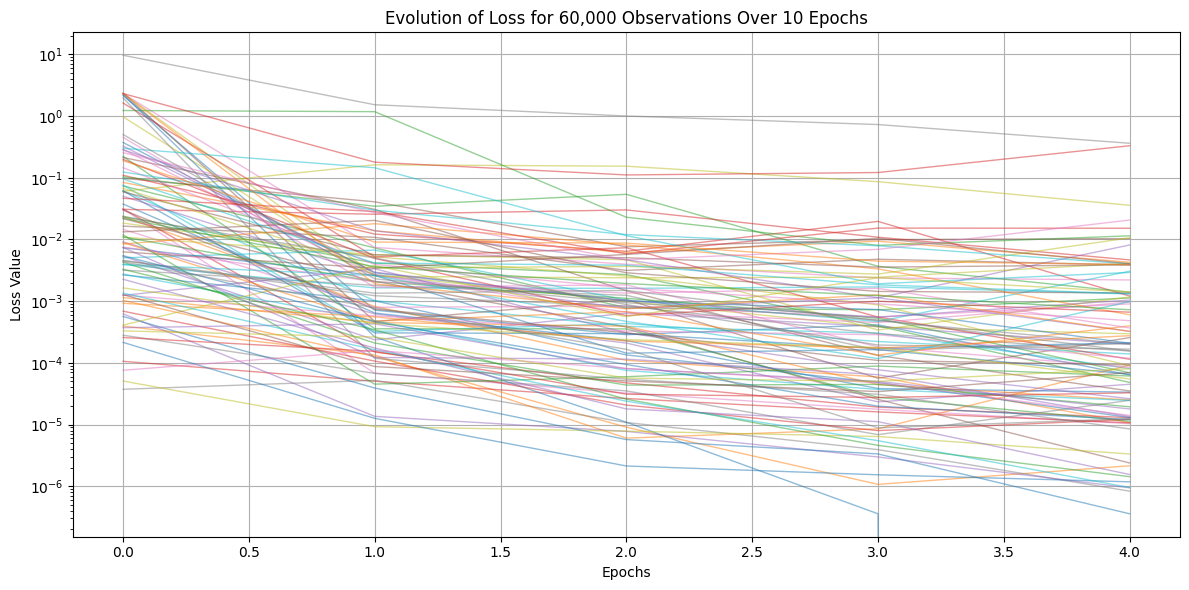

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Creating a sample tensor with dimensions (10, 60000)
# Each of the 10 rows represents an epoch, and each column represents a loss value for one of the 60,000 observations.
np.random.seed(0)  # For reproducibility
tensor = train_dataset.global_scores2 #np.random.rand(10, 60000)  # Simulating loss values

# Sampling 1000 observations from the 60,000
print(tensor.shape)
sample_indices = np.random.choice(tensor.shape[1], size=100, replace=False)

sampled_tensor = tensor[:, sample_indices]

# Plotting the evolution of the loss for the 60,000 observations over 10 epochs
plt.figure(figsize=(12, 6))

# Plotting each observation's loss over the 10 epochs
for i in tqdm(range(sampled_tensor.shape[1])):
    plt.plot(range(args.iterations), sampled_tensor[:, i], alpha=0.5, linewidth=1)  # Plotting with low opacity and thin lines for clarity

plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.yscale('log')  # Setting y-axis to log scale

plt.title('Evolution of Loss for 60,000 Observations Over 10 Epochs')
plt.grid(True)
plt.tight_layout()

plt.show()


In [3]:
observations_losses = train_dataset.global_scores2.T.numpy()

In [ ]:


import numpy as np

def obtain_latent_dataset(model, dataset, batch_size=32):

    # Assuming the dataset is a list or similar iterable with a known length
    num_samples = len(dataset)

    # Assume the dimensionality of the latent representation can be determined from one sample
    image,label, idx = dataset[0]
    image = torch.Tensor(image).to('cuda').unsqueeze(0)
    print(image.shape)
    first_latent_rep = model.get_latent_representation(image)
    latent_dim = first_latent_rep.shape[1]
    print(first_latent_rep.shape)
        
    # Preallocate the array for the latent representations
    latent_dataset = torch.zeros((num_samples, latent_dim))


    for i in tqdm( range(0, num_samples, batch_size) ):
        # Get the current batch of data
        batch_indices = list(range(i, min(i + batch_size, num_samples)))
        images,labels,idxs = dataset[batch_indices]
        images = images.to('cuda')
            
        # Process the batch to get latent representations
        batch_latent_reps = model.get_latent_representation(images) 
            
        # Store the results in the preallocated array
        latent_dataset[i:i + batch_size] = batch_latent_reps.detach().cpu()

    return latent_dataset

features =  obtain_latent_dataset(model,train_dataset,64)
train_dataset.define_latent_features(features)

